In [2175]:
# Houses prices

In [2176]:
#Libraries import
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
pd.set_option('display.max_columns',None)
print('Libraries successfully imported')

Libraries successfully imported


In [2177]:
#importing data
data = pd.read_csv('data.csv')
#the below file is obtained from insure.com 
#comparing prices of living between neighbourhoods
living_expence_index = pd.read_csv('zips.csv')


In [2178]:
#EDA
print('SHAPE OF THE DATA')
print(data.shape)
print('\n')
print('COLUMN NAMES')
print(data.columns)

SHAPE OF THE DATA
(4600, 18)


COLUMN NAMES
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [2179]:
#EDA 2
print('5 FIRST ROWS')
print(data.head())
print('\n' * 3)
print('RANDOM SAMPLE')
print(data.sample(n=10))

5 FIRST ROWS
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated          

In [2180]:
# EDA 3
print('INFORMATION')
print(data.info())
print('\n' * 3)
print('DESCRIPTION')
print(data.describe())

INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB
None




DESCRIPTION
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.0

In [2181]:
#From EDA we see that we need to:
#1 Convert date into date object
data.date = pd.to_datetime(data.date)
#2 Convert waterfront to categorical variable
data.waterfront = data.waterfront.astype('category')
#3 Convert city to categorical variable
data.city = data.city.astype('category')
#4 Separate zip and state and convert state to categorical variable
data[['state','zip']] = data.statezip.str.split(expand=True)
data.zip = data.zip.astype('int64')
#5 Join living expence index column to 'data'
data = pd.merge(data,living_expence_index,on='zip',how='inner')

print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 21 columns):
date                    4600 non-null datetime64[ns]
price                   4600 non-null float64
bedrooms                4600 non-null float64
bathrooms               4600 non-null float64
sqft_living             4600 non-null int64
sqft_lot                4600 non-null int64
floors                  4600 non-null float64
waterfront              4600 non-null category
view                    4600 non-null int64
condition               4600 non-null int64
sqft_above              4600 non-null int64
sqft_basement           4600 non-null int64
yr_built                4600 non-null int64
yr_renovated            4600 non-null int64
street                  4600 non-null object
city                    4600 non-null category
statezip                4600 non-null object
country                 4600 non-null object
state                   4600 non-null object
zip                     4600 n

In [2182]:
print(data[['cost of living index','price']]
      .groupby('cost of living index').max()
      .sort_values(by='cost of living index'),'\n')

print([np.corrcoef(data['cost of living index'],data['price'])],'\n')
print(data['cost of living index'].value_counts())

                           price
cost of living index            
0.6989                  320000.0
0.9974                 1700000.0
0.9981                 7062500.0
0.9987                 3710000.0
0.9994                 4668000.0
1.0000                12899000.0
1.0006                26590000.0
1.0013                  819000.0
1.0019                  664950.0
1.0026                 2110000.0 

[array([[ 1.        , -0.02451742],
       [-0.02451742,  1.        ]])] 

1.0000    1864
0.9981     784
1.0006     575
0.9987     515
0.9994     347
1.0013     223
0.9974     174
1.0026      67
1.0019      49
0.6989       2
Name: cost of living index, dtype: int64


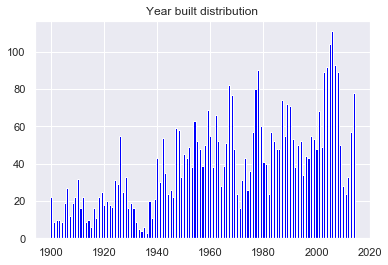

In [2183]:
#Exploring yet further in visual EDA
yr_blt_val_count = data.yr_built.value_counts()
plt.bar(yr_blt_val_count.index,yr_blt_val_count.values,color = 'blue')
plt.title('Year built distribution')
plt.show()

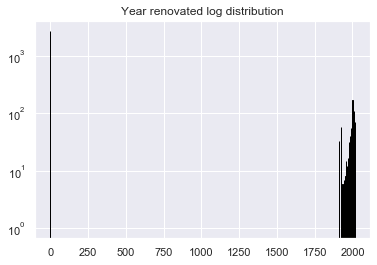

In [2184]:
yr_ren_val_count = data.yr_renovated.value_counts()
plt.bar(yr_ren_val_count.index,yr_ren_val_count.values,log=True,color='black',edgecolor='black')
plt.title('Year renovated log distribution')
plt.show()

#It appears some of the houses has not been renovated at all.
#The distribution of Yr_renovated may bewilder the model. 
#Think about converting it to factor or getting rid of it completely.
#May want to convert both of those varables into 'years since built or renovated'


In [2185]:
#Function for creating house age feature
def house_age(year_built,year_renovated):
    '''This function takes two arguments: columns year built and year renovated and defines how much time passed since the house was built or renovated'''
    diff = []
    for i in range(0,len(year_built)):
        if year_renovated[i] == 0:
            diff.append(2020-year_built[i])
        else:
            diff.append(2020-year_renovated[i])
    return diff
print('Success')

Success


In [2186]:
#The coulumn house_age in data will show the number of years passed since the house was built or renovated
age = house_age(data.yr_built,data.yr_renovated)
data['house_age'] = age
print(data.head())

        date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02  313000.0       3.0       1.50         1340      7912     1.5   
1 2014-05-05  435000.0       5.0       2.00         1840      9240     1.0   
2 2014-05-05  379950.0       4.0       1.75         1970      9389     1.0   
3 2014-05-05  449250.0       4.0       2.00         1480      3844     1.5   
4 2014-05-05  329950.0       2.0       1.00         1140      5250     1.5   

  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0          0     0          3        1340              0      1955   
1          0     0          4        1540            300      1942   
2          0     0          5        1140            830      1960   
3          0     0          5        1480              0      1928   
4          0     0          4        1140              0      1949   

   yr_renovated                street       city  statezip country state  \
0          2005  18810 Densmore Av

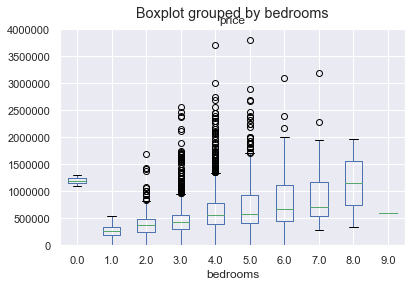

In [2187]:
#Looking at price destribution
#Distribution of price by number of bedrooms is the most interesting. 
data.boxplot(column='price', by='bedrooms')
plt.ylim(0,4000000)
plt.show()
#Number of bedrooms may be our strongest predictor

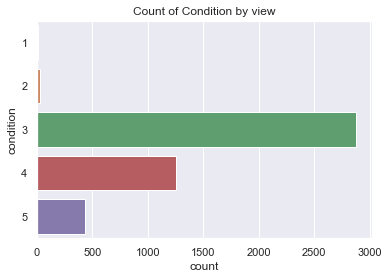

In [2188]:
#Seaborn count plot
sns.countplot(data=data, y="condition")
plt.title('Count of Condition by view')
plt.show()

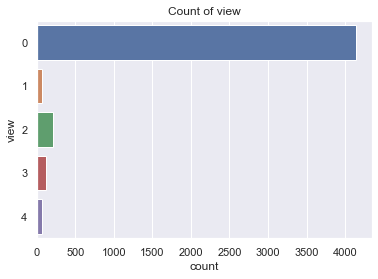

In [2189]:
#Seaborn count plot
sns.countplot(data=data, y="view")
plt.title('Count of view')
plt.show()
#Here 0 most likely represents the missing data and not the complete absence of view

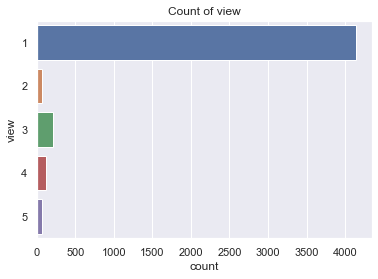

In [2190]:
#changing the scale of the view
if min(data['view']) ==0:
    data['view'] = data.view +1
    
sns.countplot(data=data, y="view")
plt.title('Count of view')
plt.show()
#the decision tree works better with the rescaled variable

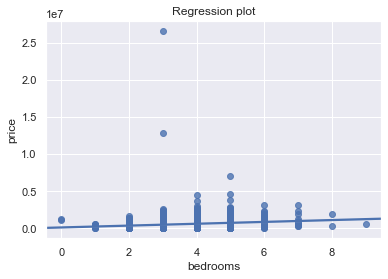

In [2191]:
#Seaborn regression plot
sns.regplot(data=data, x='bedrooms',y='price', order=1)
plt.title('Regression plot')
plt.show()
#It looks like we may have influential poins
#which have to be further investigated on the model builiding step



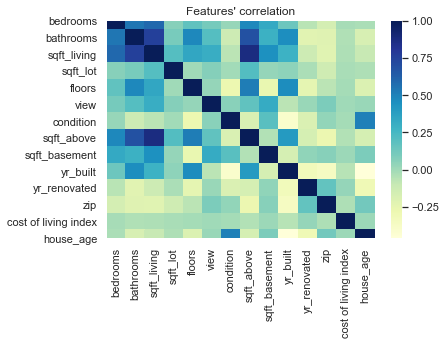





                      bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms              1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms             0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living           0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot              0.068819   0.107837     0.210538  1.000000  0.003750   
floors                0.177895   0.486428     0.344850  0.003750  1.000000   
view                  0.111028   0.211960     0.311009  0.073907  0.031211   
condition             0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above            0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement         0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built              0.142461   0.463498     0.287775  0.050706  0.467481   
yr_renovated         -0.061082  -0.215886    -0.122817 -0.022730 -0.233996   
zip                  -0.153443  -0.206231    -0.210891 -0.13

In [2192]:
#Features correlation
data1 = data.drop('price',axis=1)
#plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(data1.corr(),cmap="YlGnBu")
plt.title('Features\' correlation' )
plt.show()
# individual correlations
print('\n'*3)
print(data1.corr())


In [2193]:
#correlated variables
#sqft_living & bathrooms & bedrooms &sqft living

In [2194]:
#Exploring dates
print('min date is',min(data.date))
print('max date is',max(data.date))
#Since our timeframe too short to explore house price changes by season we'll not consider dates in this project

min date is 2014-05-02 00:00:00
max date is 2014-07-10 00:00:00


In [2195]:
#Exploring anomalies

# 0 bedrooms
print(pd.unique(data.bedrooms))
print('\n'*2)
#It looks like we have 0 bedrooms in some houses
print(data[data.bedrooms == 0])
print('\n'*2)
#It's hardly believable that houses for over 1 million dollars 
#don't have any bedrooms
print("The number of houses with 0 bedrooms is", data[data.bedrooms == 0].bedrooms.count())
print('\n'*2)
#There are only two of these observations so we can harmlessly
#removed them from our dataset
# Countries
print(pd.unique(data.country)) 
#The country is always USA so we can remove this variable
print('\n'*2)
# states
print(pd.unique(data.state)) 
#The state is always WA so we can remove this variable
print('\n'*2)
# Streets
print('There are',data.street.value_counts().count(),'unique streets in our dataset')
# Since we are not going to do geographic analysis here we can remove
# the street variable as it's not going to work as factor in this case

[3. 5. 4. 2. 1. 8. 6. 7. 0. 9.]



           date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1305 2014-06-12  1095000.0       0.0        0.0         3064      4764   
2891 2014-06-24  1295648.0       0.0        0.0         4810     28008   

      floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
1305     3.5          0     3          3        3064              0      1990   
2891     2.0          0     1          3        4810              0      1990   

      yr_renovated            street     city  statezip country state    zip  \
1305          2009     814 E Howe St  Seattle  WA 98102     USA    WA  98102   
2891          2009  20418 NE 64th Pl  Redmond  WA 98053     USA    WA  98053   

      cost of living index  house_age  
1305                1.0000         11  
2891                0.9987         11  



The number of houses with 0 bedrooms is 2



['USA']



['WA']



There are 4525 unique streets in our dataset


In [2196]:
# Cleaning
# Dropping columns and rows
#data['bath_bed'] = data.bathrooms*data.bedrooms
data = data.drop(data[data.bedrooms == 0].index,axis=0) 
data = data.drop(data[data.price>5000000].index,axis=0)
data = data.drop(['date','statezip','street','country',
                  'state','zip','yr_built','yr_renovated',
                  'city'],axis=1)

#As the gap in the index was created we'll need to reset index
data.reset_index(inplace=True,drop=True)


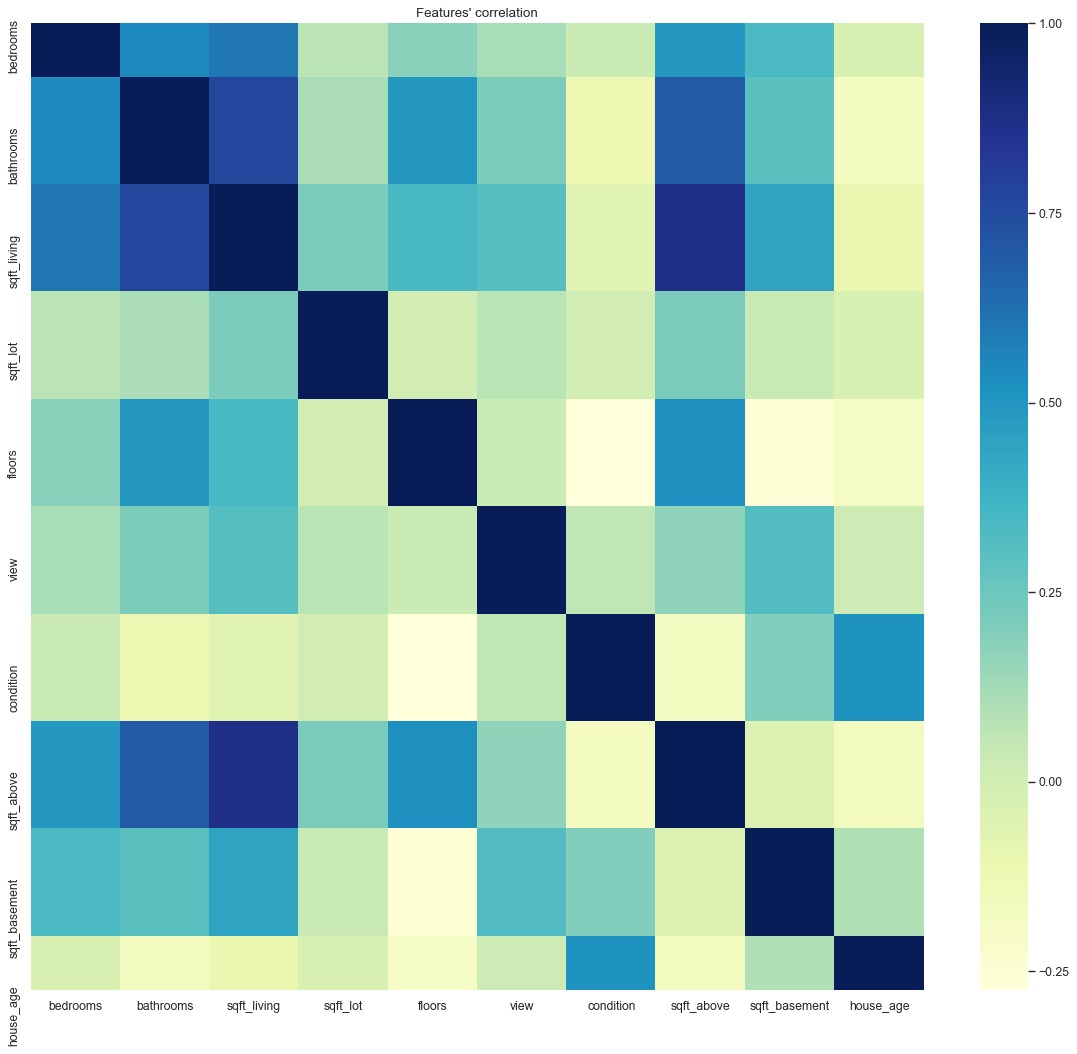

In [2197]:
data1=data.drop('price',axis=1)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.heatmap(data1.corr(),cmap="YlGnBu")
plt.title('Features\' correlation' )
plt.show()
#print(data1.corr()[data1.corr()>0.5])

In [2198]:
#Other variables with high correlation will be discarded by the model 
#during node splitting

In [2199]:
#Model building step

In [2200]:
#Importing neccessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
print('Libraries successfully imported')

Libraries successfully imported


In [2201]:
#Splitting the data
X=data.drop('price',axis=1)
y=data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [2202]:
#Setting up random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
import time

In [2203]:
from datetime import datetime
import time

#displaying time
def display_time (start,end):
    if (end-start)>3600:
        hours = (end-start)//3600
        minutes = (end-start)%3600
        seconds = (end-start)%60
        print('Time needed for execution is',hours,' hours ',minutes,' minutes ',round(seconds),' seconds')
    elif (end-start)>60:
        minutes = (end-start)//60
        seconds = (end-start)%60
        print('Time needed for execution is',minutes,' minutes ',round(seconds),' seconds')
    else :
        seconds = end-start
        print('Time needed for execution is',round(seconds),' seconds')
    


In [2204]:
#Instantiating the model
dt = DecisionTreeRegressor(random_state=33) #criterion = 'mae'

#Creating parameter grid
max_depth = [int(x) for x in np.linspace(4, 11, num = 8)]

params_dt = {   'max_depth': max_depth,
                'max_features':['auto','sqrt'],
                'min_samples_leaf':[0.015,0.01,0.005,0.0035],
                'min_samples_split':[30,45,50,55,60,75]}
print('Done')

Done


In [2205]:
#Instantiating the Grid Search
grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring='neg_mean_squared_error',
                       cv=4,
                       verbose=1,
                       n_jobs=-1,)



In [2206]:
#Training the model
start=time.time()

grid_dt.fit(X_train,y_train)

print("Best hyperparameters:\n", grid_dt.best_params_)

best_model = grid_dt.best_estimator_
best_score = grid_dt.best_score_
y_pred=best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)
print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))
end = time.time()

display_time(start,end)


print('Ended at',datetime.fromtimestamp(end).strftime("%B %d, %I:%M:%S"))

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.7s


Best hyperparameters:
 {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.015, 'min_samples_split': 30}
RMSE of dt: 286417.10
MAE of dt: 174903.53
Time needed for execution is 4  seconds
Ended at May 19, 01:22:04


[Parallel(n_jobs=-1)]: Done 1536 out of 1536 | elapsed:    3.4s finished


In [2208]:
without_feature = [261,241,284,259,276,244,271,264]
with_feature = [241,258,244,263,230,239,267,213]
print('with feature',np.mean(with_feature),
'without feature',np.mean(without_feature))

with feature 244.375 without feature 262.5


In [803]:
#Let's explore the underfitting and overfitting
#fitting and predicting
#dt.fit(X_train,y_train)
y_pred_train = best_model.predict(X_train)
mse_dt = MSE(y_train,y_pred_train)
rmse_dt = mse_dt**0.5
print('Square root of the Mean Squared error:{:.2f}'.format(rmse_dt))

Square root of the Mean Squared error:231298.08


In [804]:
#Cross validation
MSE_CV_scores = -cross_val_score(best_model, X_train,y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 260461.75


In [318]:
#fitting and predicting
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(y_pred,y_test)
rmse_dt = mse_dt**0.5
print('Square root of the Mean Squared error:{:.2f}'.format(rmse_dt))

Square root of the Mean Squared error:313226.86


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


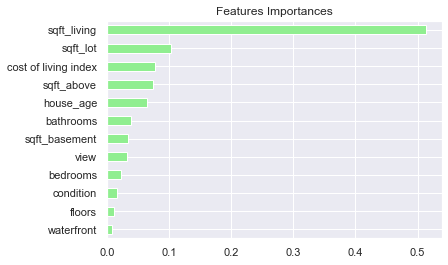

In [805]:
#visualizing feature importance
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()

In [806]:
#Instantiating Random Forest 
rf=RandomForestRegressor()

In [807]:
#Creating parameter grid
n_estimators = [int(x) for x in np.linspace(600, stop = 900, num = 4)]
max_depth = [int(x) for x in np.linspace(12, 16, num = 5)]

params_rf = {'n_estimators': n_estimators,
                 'max_depth': max_depth,
                'max_features':['auto','sqrt'],
                'min_samples_leaf':[0.005,0.0025,0.0015,0.001,0.0005],
                'min_samples_split':[7,10,12,15,20]}
print('Done')

Done


In [808]:
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=4,
                       verbose=1,
                       n_jobs=4 )
print('Done')

Done


In [801]:
#Training the model
start = time.time()
grid_rf.fit(X_train,y_train)
print("Best hyperparameters:\n", grid_rf.best_params_)
best_model = grid_rf.best_estimator_
y_pred=best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**0.5
mae = MAE(y_test,y_pred)
print('RMSE of rf: {:.2f}'.format(rmse_test))
print('MAE of rf: {:.2f}'.format(mae))
end = time.time()

display_time(start,end)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 10.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 13.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 23.2min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 30.8min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 40.6min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 53.1min
[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed: 66.5min finished


Best hyperparameters:
 {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 0.001, 'min_samples_split': 20, 'n_estimators': 800}
RMSE of rf: 202597.39
MAE of rf: 123424.22
Time needed for execution is 1.0  hours  395.57879662513733  minutes  36  seconds


In [809]:
from sklearn.model_selection import RandomizedSearchCV

randomiz_rf = RandomizedSearchCV(estimator=rf,
                                 param_distributions=params_rf,
                                 n_iter=100,
                                scoring='neg_mean_squared_error',
                                 cv=4,
                                 verbose=1,
                                 n_jobs=4)

randomiz_rf.fit(X_train,y_train)
print("Best hyperparameters:\n", randomiz_rf.best_params_)
best_model = randomiz_rf.best_estimator_
y_pred=best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)
print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

Success
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.3min
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  6.4min finished


Best hyperparameters:
 {'n_estimators': 800, 'min_samples_split': 7, 'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 14}
RMSE of dt: 217261.32
MAE of dt: 137931.97


In [803]:
#Boosting with Adaboost

In [810]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
dt = DecisionTreeRegressor()

n_estimators = [int(x) for x in np.linspace(50,400,num=8)]
learning_rate = [round(x,3) for x in np.logspace(0,-3,num=10)]
param_dist = {
 'n_estimators': n_estimators,
 'learning_rate' : learning_rate,
 'loss' : ['linear', 'square', 'exponential']
 }

ada_rand = RandomizedSearchCV(AdaBoostRegressor(),
                             param_distributions = param_dist,
                              scoring='neg_mean_squared_error',
                             cv=4,
                              verbose=2,
                             n_iter = 100,
                             n_jobs=-1)


In [811]:
#fitting and determining the best estimator 

start = time.time()
ada_rand.fit(X_train, y_train)

print("Best hyperparameters:\n", ada_rand.best_params_)

best_model = ada_rand.best_estimator_
y_pred=best_model.predict(X_test)

rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

print('\n')
display_time(start,end)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.2min finished


Best hyperparameters:
 {'n_estimators': 50, 'loss': 'square', 'learning_rate': 0.002}
RMSE of dt: 242047.56
MAE of dt: 160046.04


Time needed for execution is 2.0  minutes  13  seconds


In [812]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()


In [813]:
#setting up parameter grid
n_estimators = [int(x) for x in np.linspace(50,400,num=8)]
learning_rate = [round(x,3) for x in np.logspace(0,-3,num=10)]
max_depth = [int(x) for x in np.linspace(5,10,num=6)]

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01, 0.005, 0.001],
              'subsample':[0.7,0.8,0.9],
              'n_estimators': n_estimators,
              'max_depth':max_depth,
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[0.005,0.0035,0.0025,0.0015,0.001],
            'min_samples_split':[10,15,20,25]}

In [814]:
rand_gbr = RandomizedSearchCV(estimator=gbr,
                             param_distributions=param_grid,
                             scoring='neg_mean_squared_error',
                             cv=4,
                              verbose=2,
                             n_iter = 1000,
                             n_jobs=4)

In [815]:
start = time.time()
rand_gbr.fit(X_train, y_train)

print("Best hyperparameters:\n", rand_gbr.best_params_)

best_model = rand_gbr.best_estimator_
y_pred=best_model.predict(X_test)

rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

print('\n')
display_time(start,end)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   34.7s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  9.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done 4000 out of 4000 | elapsed: 15.2min finished


Best hyperparameters:
 {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 25, 'min_samples_leaf': 0.001, 'max_features': 'sqrt', 'max_depth': 8, 'learning_rate': 0.05}
RMSE of dt: 219237.86
MAE of dt: 135039.67


Time needed for execution is 15.0  minutes  12  seconds


In [838]:
n_estimators = [int(x) for x in np.linspace(300,500,num=5)]


param_grid = {'learning_rate': [0.02,0.015,0.01,0.005,0.001],
              'n_estimators':n_estimators,
              'subsample':[0.7,0.8,0.9],
              'max_depth':[7,8,9],
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[0.004,0.0035,0.003,0.0025,0.0015],
            'min_samples_split':[7,10,15,20,25]}

In [839]:
grid_gbr = GridSearchCV(estimator=gbr,
                       param_grid=param_grid,
                       cv=4,
                        scoring='neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = 6,
                       )

In [ ]:
start = time.time()
grid_gbr.fit(X_train, y_train)

print("Best hyperparameters:\n", grid_gbr.best_params_)

best_model = grid_gbr.best_estimator_
y_pred=best_model.predict(X_test)

rmse_test = MSE(y_test,y_pred)**0.5
mae_test = MAE(y_test,y_pred)

print('RMSE of dt: {:.2f}'.format(rmse_test))
print('MAE of dt: {:.2f}'.format(mae_test))

end = time.time()

print('\n')
display_time(start,end)

Fitting 4 folds for each of 11250 candidates, totalling 45000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   16.8s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  9.9min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 11.7min
[Parallel(n_jobs=6)]: Done 3188 tasks      | elapsed: 14.5min
[Parallel(n_jobs=6)]: Done 4038 tasks      | elapsed: 20.3min
[Parallel(n_jobs=6)]: Done 4988 tasks      | elapsed: 25.1min
[Parallel(n_jobs=6)]: Done 6038 tasks      | elapsed: 28.5min
[Parallel(n_jobs=6)]: Done 7188 tasks      | elapsed: 37.4min
[Parallel(n_jobs=6)]: Done 8438 tasks      | elapsed: 43.1min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed: 50.0min


In [813]:
end= time.time()
datetime.fromtimestamp(end).strftime("%B %d, %Y %I:%M:%S")

'May 06, 2020 03:00:50'